# 10 lỗi sai trong Visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/V02.01.csv', encoding = "ISO-8859-1")

In [3]:
x = pd.ExcelFile('../data/V02.01.xlsx')

In [4]:
x.sheet_names

['V02.01']

In [5]:
df = x.parse('V02.01', skiprows=2).drop([0], axis=0)

In [6]:
df.columns = ['Tỉnh', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022']

In [7]:
df['Tỉnh'].unique()

array(['CẢ NƯỚC', 'Đồng bằng sông Hồng', 'Hà Nội', 'Vĩnh Phúc',
       'Bắc Ninh', 'Quảng Ninh', 'Hải Dương', 'Hải Phòng', 'Hưng Yên',
       'Thái Bình', 'Hà Nam', 'Nam Định', 'Ninh Bình',
       'Trung du và miền núi phía Bắc', 'Hà Giang', 'Cao Bằng', 'Bắc Kạn',
       'Tuyên Quang', 'Lào Cai', 'Yên Bái', 'Thái Nguyên', 'Lạng Sơn',
       'Bắc Giang', 'Phú Thọ', 'Điện Biên', 'Lai Châu', 'Sơn La',
       'Hoà Bình', 'Bắc Trung Bộ và Duyên hải miền Trung', 'Thanh Hoá',
       'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên Huế',
       'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 'Phú Yên',
       'Khánh Hoà', 'Ninh Thuận', 'Bình Thuận', 'Tây Nguyên', 'Kon Tum',
       'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'Đông Nam Bộ',
       'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai',
       'Bà Rịa - Vũng Tàu', 'TP.Hồ Chí Minh', 'Đồng bằng sông Cửu Long',
       'Long An', 'Tiền Giang', 'Bến Tre', 'Trà Vinh', 'Vĩnh Long',
       'Đồng Tháp', 'An Giang', 'Kiên Gian

In [8]:
mapping = {'Đồng bằng sông Hồng': ['Hà Nội', 'Vĩnh Phúc',
       'Bắc Ninh', 'Quảng Ninh', 'Hải Dương', 'Hải Phòng', 'Hưng Yên',
       'Thái Bình', 'Hà Nam', 'Nam Định', 'Ninh Bình'],
       'Trung du và miền núi phía Bắc':['Hà Giang', 'Cao Bằng', 'Bắc Kạn',
       'Tuyên Quang', 'Lào Cai', 'Yên Bái', 'Thái Nguyên', 'Lạng Sơn',
       'Bắc Giang', 'Phú Thọ', 'Điện Biên', 'Lai Châu', 'Sơn La',
       'Hoà Bình'],
      'Bắc Trung Bộ và Duyên hải miền Trung': ['Thanh Hoá',
       'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên Huế',
       'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 'Phú Yên',
       'Khánh Hoà', 'Ninh Thuận', 'Bình Thuận'],
       'Tây Nguyên': ['Kon Tum',
       'Gia Lai', 'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng'],
       'Đông Nam Bộ':[
       'Bình Phước', 'Tây Ninh', 'Bình Dương', 'Đồng Nai',
       'Bà Rịa - Vũng Tàu', 'TP.Hồ Chí Minh'],
       'Đồng bằng sông Cửu Long':[
       'Long An', 'Tiền Giang', 'Bến Tre', 'Trà Vinh', 'Vĩnh Long',
       'Đồng Tháp', 'An Giang', 'Kiên Giang', 'Cần Thơ', 'Hậu Giang',
       'Sóc Trăng', 'Bạc Liêu', 'Cà Mau']
       }

tinh_to_khu_vuc = {}
for k, v in  mapping.items():
    for val in v:
        tinh_to_khu_vuc[val] = k 

In [9]:
df['Khu vực'] = df['Tỉnh'].map(tinh_to_khu_vuc)

In [10]:
tinh = df[~df['Khu vực'].isnull()].reset_index(drop=True)

In [11]:
tinh

,Tỉnh,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Khu vực
0,Hà Nội,6825.82,6991.43,7128.39,7285.53,7433.6,7590.8,7742.2,7914.5,8093.9,8246.54,8330.83,8435.65,Đồng bằng sông Hồng
1,Vĩnh Phúc,1029.5,1047.39,1061.5,1076.82,1090.4,1106.1,1123.1,1138.4,1154.8,1171.2,1191.78,1197.62,Đồng bằng sông Hồng
2,Bắc Ninh,1072.38,1104.69,1139.89,1177.06,1218.5,1257.9,1297.8,1337.3,1378.6,1419.13,1462.95,1488.2,Đồng bằng sông Hồng
3,Quảng Ninh,1181.53,1198.39,1209.58,1227.67,1241.6,1261.2,1285.2,1303.9,1324.8,1337.61,1350.85,1362.88,Đồng bằng sông Hồng
4,Hải Dương,1747.83,1767.83,1779.67,1795.79,1812.8,1832.8,1850.6,1877.7,1896.9,1916.77,1936.78,1946.82,Đồng bằng sông Hồng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Cần Thơ,1195.93,1200.93,1203.23,1205.72,1208.5,1214.6,1222.4,1227.7,1236,1240.73,1246.99,1252.35,Đồng bằng sông Cửu Long
59,Hậu Giang,752.73,750.73,747.88,744.95,742.4,740.1,737.3,734.9,732.2,729.78,729.89,729.47,Đồng bằng sông Cửu Long
60,Sóc Trăng,1273.93,1266.42,1254.98,1245.61,1236.3,1227.6,1218.3,1208.8,1199.5,1195.74,1206.82,1197.82,Đồng bằng sông Cửu Long
61,Bạc Liêu,866.87,872.14,877.04,882.16,887.3,892.8,897.7,903,908.2,913.48,918.51,921.81,Đồng bằng sông Cửu Long


In [12]:
for c in tinh.columns[1:-1]:
    tinh[c] = tinh[c].astype(int)

In [13]:
tinh['tang_truong_2012_2022'] = tinh['2022'] / tinh['2012'] *100 - 100

In [14]:
tinh[~tinh['Tỉnh'].isin(['Hà Nội', "TP.Hồ Chí Minh"])]

,Tỉnh,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Khu vực,tang_truong_2012_2022
1,Vĩnh Phúc,1029,1047,1061,1076,1090,1106,1123,1138,1154,1171,1191,1197,Đồng bằng sông Hồng,14.326648
2,Bắc Ninh,1072,1104,1139,1177,1218,1257,1297,1337,1378,1419,1462,1488,Đồng bằng sông Hồng,34.782609
3,Quảng Ninh,1181,1198,1209,1227,1241,1261,1285,1303,1324,1337,1350,1362,Đồng bằng sông Hồng,13.689482
4,Hải Dương,1747,1767,1779,1795,1812,1832,1850,1877,1896,1916,1936,1946,Đồng bằng sông Hồng,10.130164
5,Hải Phòng,1886,1912,1932,1950,1969,1985,2001,2016,2033,2053,2072,2088,Đồng bằng sông Hồng,9.205021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Cần Thơ,1195,1200,1203,1205,1208,1214,1222,1227,1236,1240,1246,1252,Đồng bằng sông Cửu Long,4.333333
59,Hậu Giang,752,750,747,744,742,740,737,734,732,729,729,729,Đồng bằng sông Cửu Long,-2.800000
60,Sóc Trăng,1273,1266,1254,1245,1236,1227,1218,1208,1199,1195,1206,1197,Đồng bằng sông Cửu Long,-5.450237
61,Bạc Liêu,866,872,877,882,887,892,897,903,908,913,918,921,Đồng bằng sông Cửu Long,5.619266


In [15]:
data = tinh[tinh['2022']<2000]
# data = tinh[~tinh['Tỉnh'].isin(['Hà Nội', "TP.Hồ Chí Minh"])]

Text(0, 0.5, 'Tốc độ tăng trưởng dân số 2012-2022(%)')

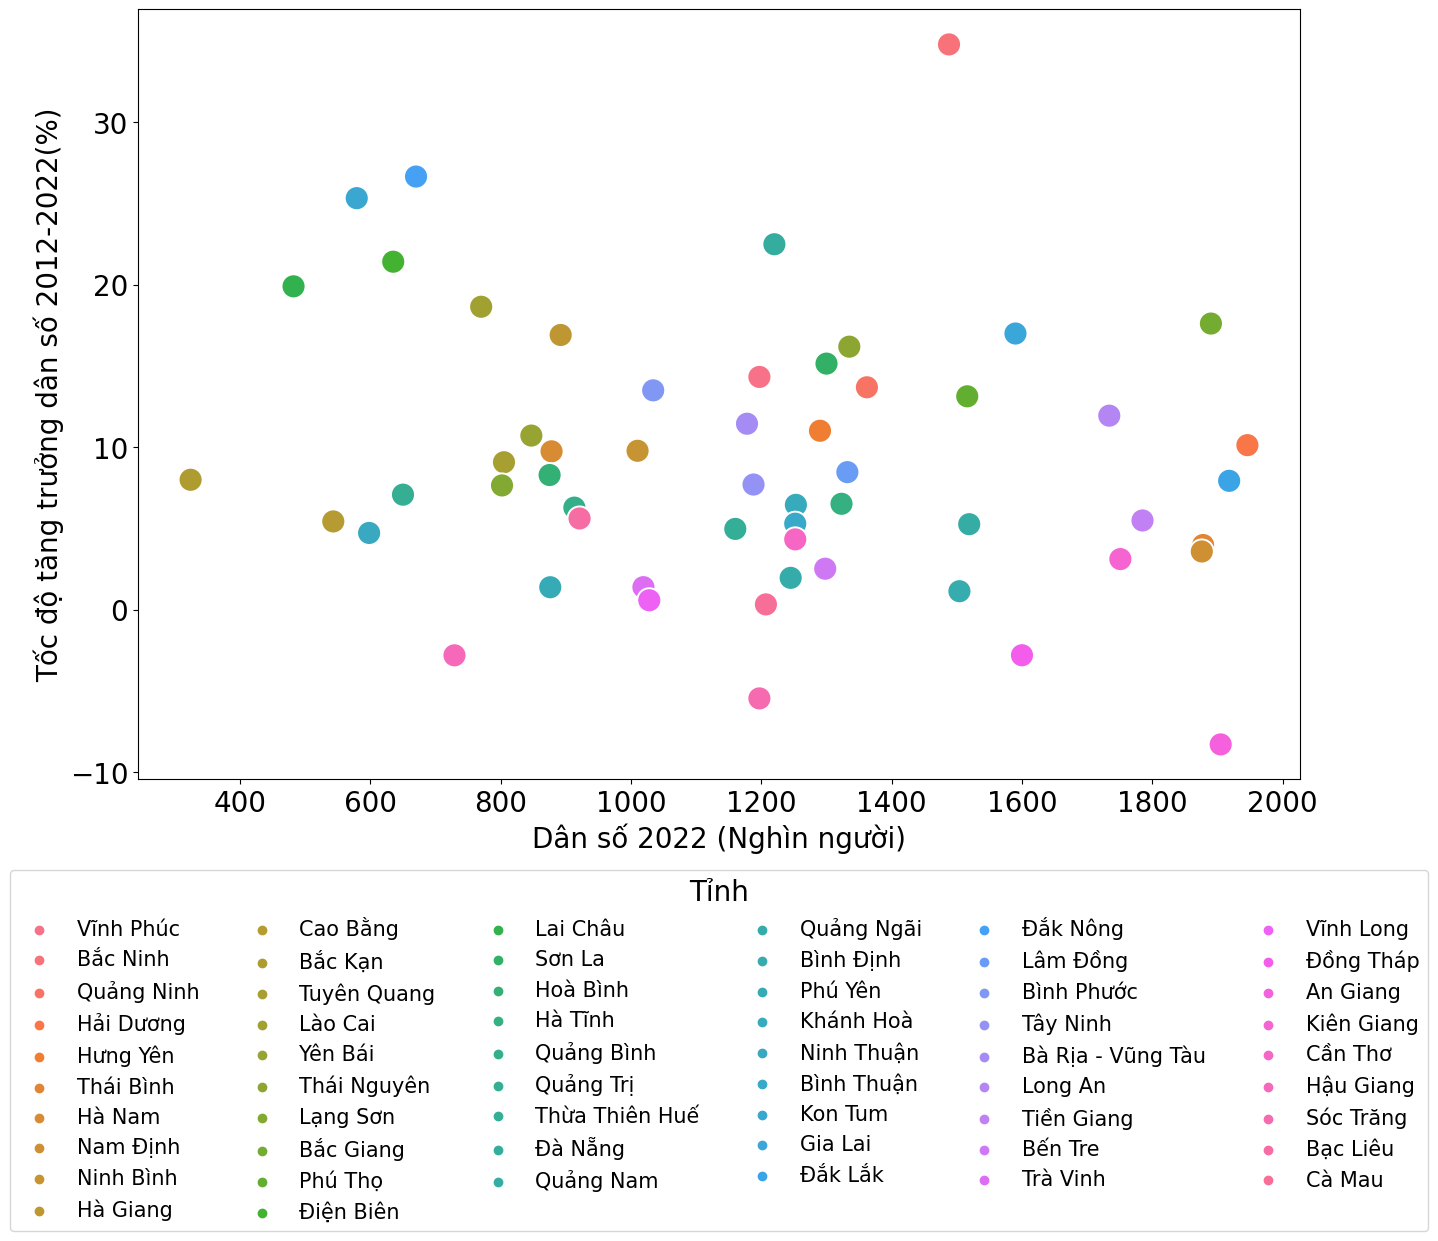

In [16]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='2022', y='tang_truong_2012_2022',  
                     hue='Tỉnh',data=data, 
                     s=300)
legend = plt.legend(title="Tỉnh", ncol=6,bbox_to_anchor=(0.5, -0.6),loc='lower center',
           prop={'size': 15})
plt.setp(legend.get_title(),fontsize=20)

_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)
plt.xlabel("Dân số 2022 (Nghìn người)", fontsize=20)
plt.ylabel("Tốc độ tăng trưởng dân số 2012-2022(%)",fontsize=20)

In [17]:
mapping2 = {'Đồng bằng sông Hồng':"Miền Bắc",
            'Trung du và miền núi phía Bắc': "Miền Bắc",
            'Bắc Trung Bộ và Duyên hải miền Trung':"Miền Trung",
              'Tây Nguyên':'Miền Trung',
              'Đông Nam Bộ': 'Miền Nam',
            'Đồng bằng sông Cửu Long': 'Miền Nam'
            }
data['Khu vực 2'] = data['Khu vực'].map(mapping2)

C:\Users\duclh3\AppData\Local\Temp\ipykernel_10296\2080694649.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Khu vực 2'] = data['Khu vực'].map(mapping2)


In [18]:
tinh[tinh['2022']>=2000]['Tỉnh'].unique()


array(['Hà Nội', 'Hải Phòng', 'Thanh Hoá', 'Nghệ An', 'Bình Dương',
       'Đồng Nai', 'TP.Hồ Chí Minh'], dtype=object)

In [19]:
data[data['tang_truong_2012_2022'] == data['tang_truong_2012_2022'].max()]

,Tỉnh,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Khu vực,tang_truong_2012_2022,Khu vực 2
2,Bắc Ninh,1072,1104,1139,1177,1218,1257,1297,1337,1378,1419,1462,1488,Đồng bằng sông Hồng,34.782609,Miền Bắc


In [20]:
data.sample(10, random_state=10)

,Tỉnh,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Khu vực,tang_truong_2012_2022,Khu vực 2
34,Bình Định,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1508,1504,Bắc Trung Bộ và Duyên hải miền Trung,1.143241,Miền Trung
4,Hải Dương,1747,1767,1779,1795,1812,1832,1850,1877,1896,1916,1936,1946,Đồng bằng sông Hồng,10.130164,Miền Bắc
36,Khánh Hoà,1170,1177,1184,1192,1198,1207,1216,1224,1232,1240,1248,1253,Bắc Trung Bộ và Duyên hải miền Trung,6.457094,Miền Trung
31,Đà Nẵng,968,996,1017,1033,1056,1080,1097,1114,1141,1169,1195,1220,Bắc Trung Bộ và Duyên hải miền Trung,22.489960,Miền Trung
23,Sơn La,1115,1129,1143,1159,1177,1194,1213,1233,1252,1270,1287,1300,Trung du và miền núi phía Bắc,15.146147,Miền Bắc
19,Bắc Giang,1586,1607,1630,1646,1667,1696,1736,1777,1810,1841,1875,1890,Trung du và miền núi phía Bắc,17.610454,Miền Bắc
51,Tiền Giang,1682,1692,1705,1716,1728,1740,1751,1759,1766,1772,1779,1785,Đồng bằng sông Cửu Long,5.496454,Miền Nam
3,Quảng Ninh,1181,1198,1209,1227,1241,1261,1285,1303,1324,1337,1350,1362,Đồng bằng sông Hồng,13.689482,Miền Bắc
27,Hà Tĩnh,1236,1242,1247,1255,1261,1266,1274,1280,1290,1296,1314,1323,Bắc Trung Bộ và Duyên hải miền Trung,6.521739,Miền Trung
30,Thừa Thiên Huế,1100,1105,1109,1111,1114,1118,1123,1125,1129,1133,1153,1160,Bắc Trung Bộ và Duyên hải miền Trung,4.977376,Miền Trung


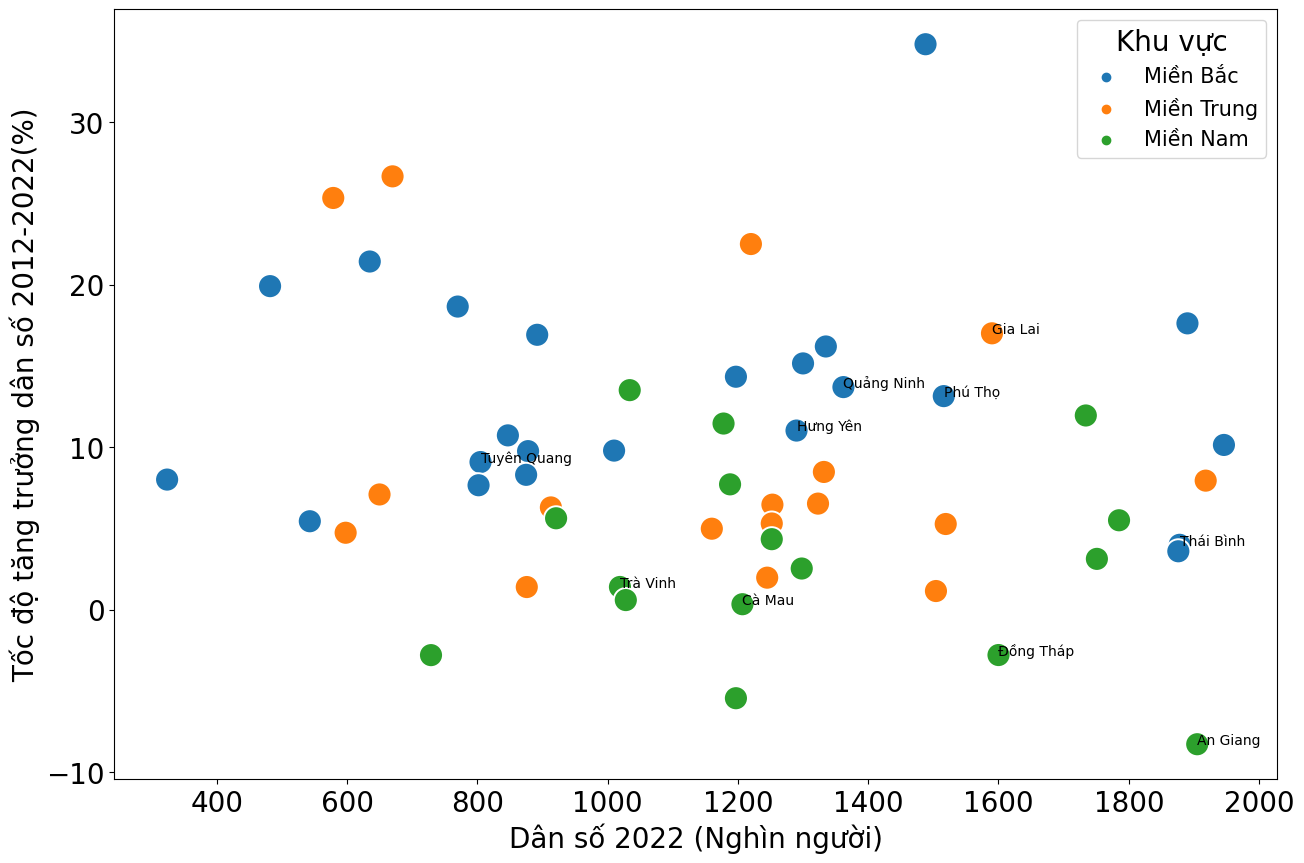

In [21]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='2022', y='tang_truong_2012_2022',  
                     hue='Khu vực 2',data=data, 
                     s=300)
legend = plt.legend(title="Khu vực",
           prop={'size': 15})
plt.setp(legend.get_title(),fontsize=20)

_ = plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)
plt.xlabel("Dân số 2022 (Nghìn người)", fontsize=20)
plt.ylabel("Tốc độ tăng trưởng dân số 2012-2022(%)",fontsize=20)
for i, row in data.sample(10, random_state=20).iterrows():
    plt.text(row['2022'], row['tang_truong_2012_2022'], row["Tỉnh"])
# plt.tight_layout()

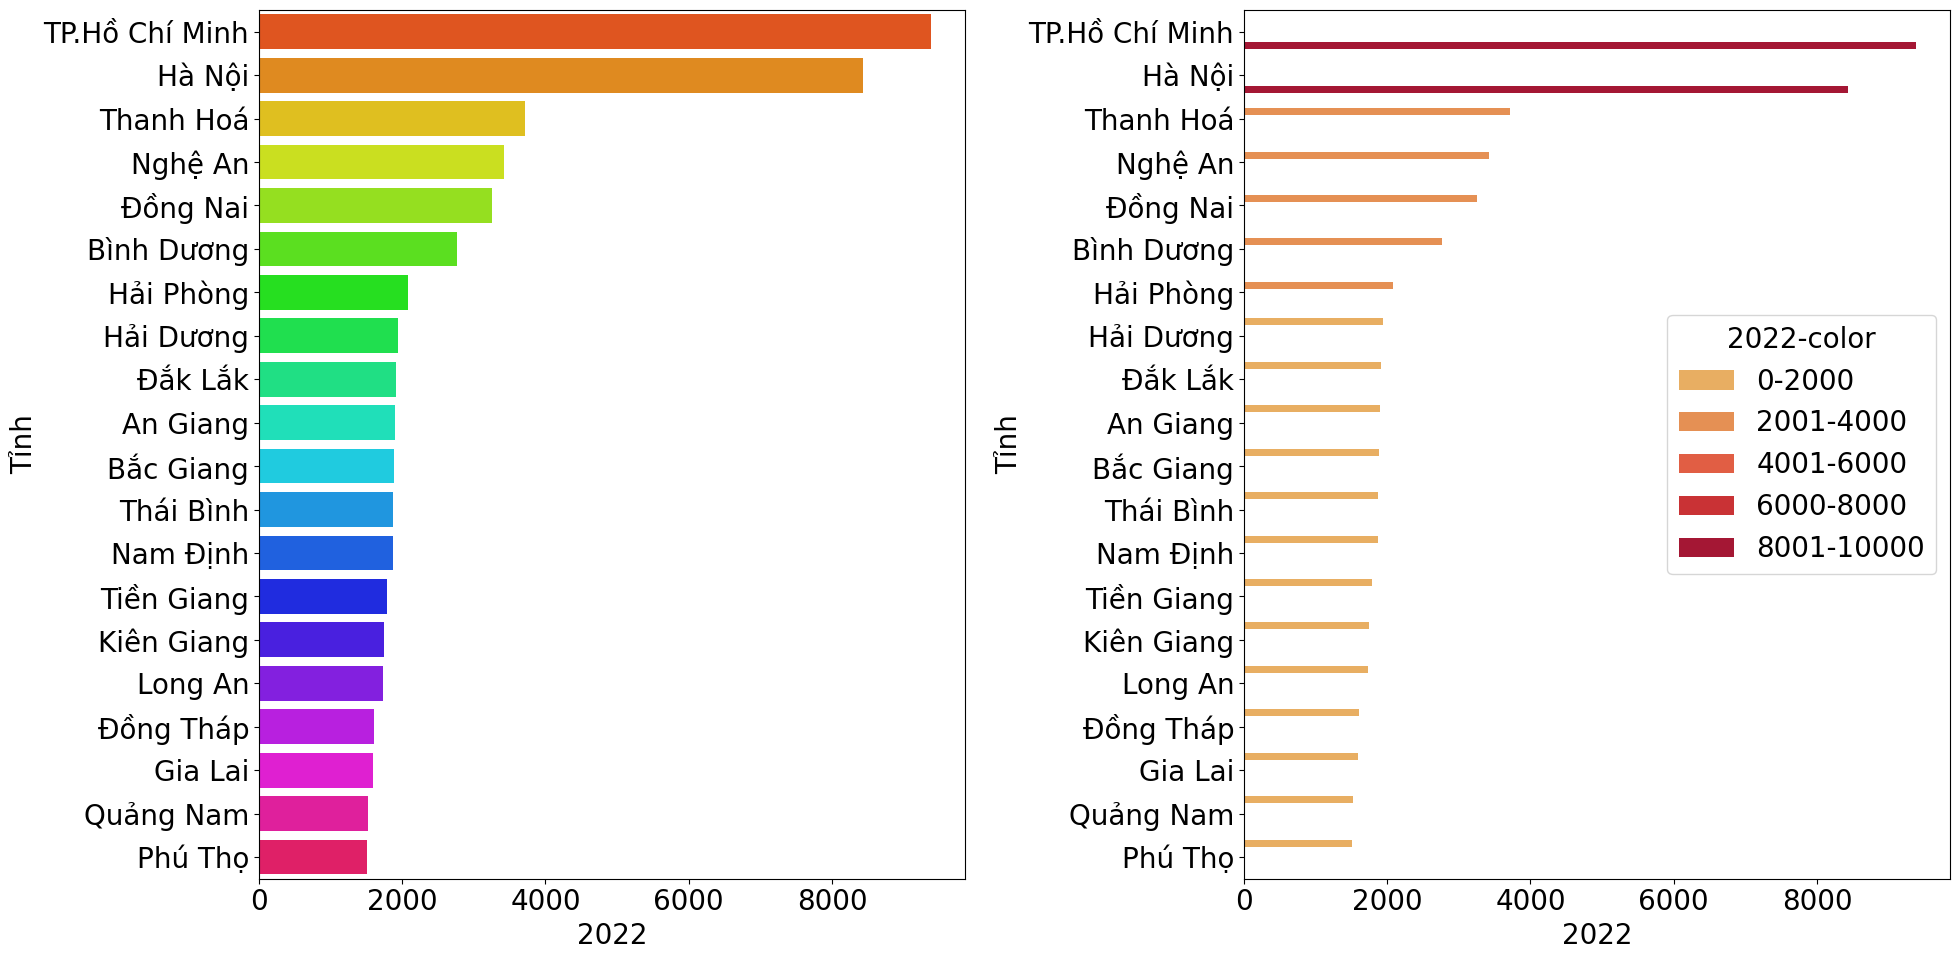

In [35]:
fig, axs =plt.subplots(1,2, figsize=(20,10))
colors = sns.color_palette("hsv", n_colors=64)
sns.barplot(x='2022', y='Tỉnh', data=tinh.sort_values('2022',ascending=False).head(20), palette="hsv", ax=axs[0])
tinh['2022-color'] = pd.cut(tinh['2022'],[0,2000,4000,6000, 8000,10000],labels=['0-2000', '2001-4000','4001-6000','6000-8000','8001-10000'])
colors = sns.color_palette("hsv", n_colors=tinh['2022-color'].nunique())
sns.barplot(x='2022', y='Tỉnh', data=tinh.sort_values('2022',ascending=False).head(20),  hue='2022-color', palette=sns.color_palette("YlOrRd", 7)[2:], ax=axs[1])
plt.tight_layout()

In [23]:
tinh.sort_values('2022',ascending=False, inplace=True)

<Axes: xlabel='2022', ylabel='Count'>

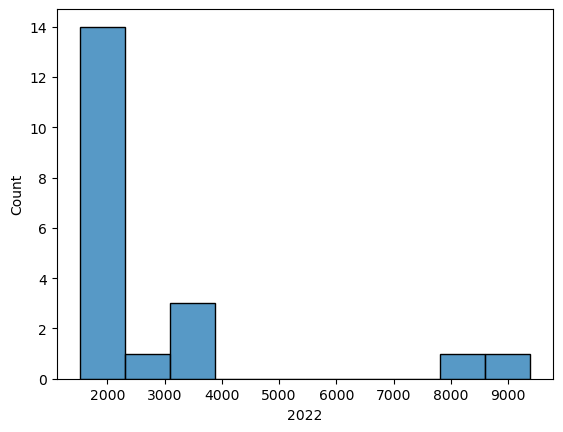

In [24]:
sns.histplot(tinh['2022'].head(20))

In [25]:
godaddy_train = pd.read_csv('../data/godaddy_train.csv')

In [26]:
godaddy_train['cfips'].unique()

array([ 1001,  1003,  1005, ..., 56041, 56043, 56045], dtype=int64)

In [27]:
godaddy_train['first_day_of_month'] = pd.to_datetime(godaddy_train['first_day_of_month'])

In [34]:
import numpy as np
np.random.seed(42)
np.random.choice(godaddy_train['cfips'].unique(), 30)

array([19147, 26131, 22039, 21209, 55103, 30085, 40083, 13165, 26019,
       12027, 29003, 40015, 51600,  5043, 31067, 18149, 46067, 29069,
       51077, 47019, 25001, 20139, 45023, 23019, 13151,  1043, 42119,
       18105, 51185, 13181], dtype=int64)

In [28]:
data = godaddy_train[godaddy_train.cfips.isin([19147, 26131, 22039, 21209, 55103, 30085, 40083, 13165, 26019,
       12027, 29003, 40015, 51600,  5043, 31067, 18149, 46067, 29069,
       51077, 47019, 25001, 20139, 45023, 23019, 13151,  1043, 42119,
       18105, 51185, 13181])]

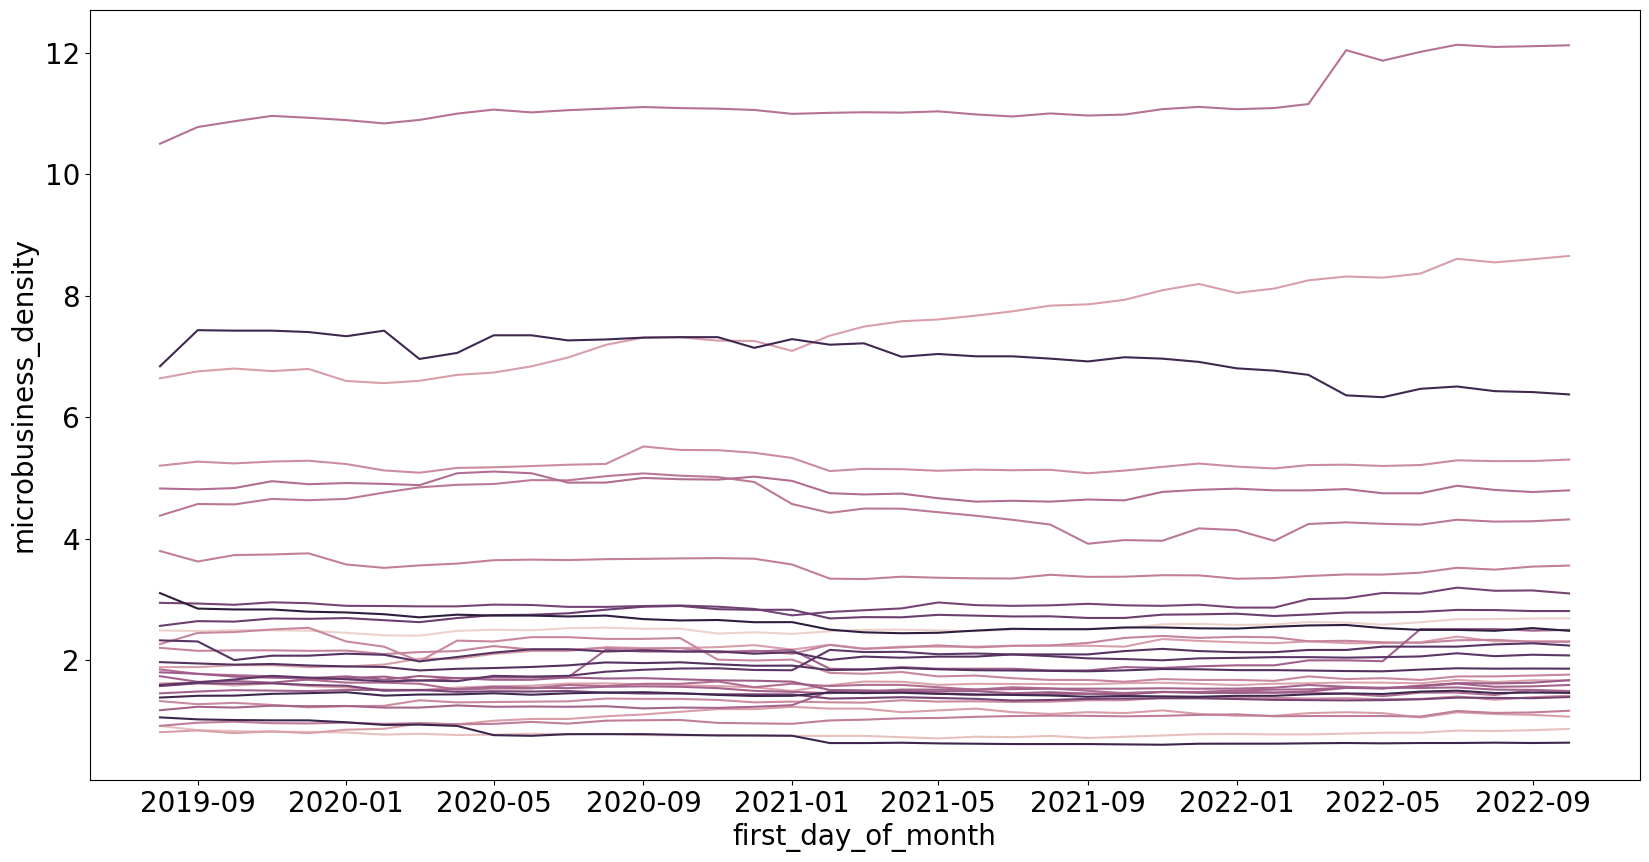

In [48]:
import matplotlib


plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
ax = sns.lineplot(y='microbusiness_density', x='first_day_of_month', hue='cfips', data=data)
# legend = plt.legend(title="cfips", ncol=6,bbox_to_anchor=(0.5, -0.6),loc='lower center',
#            prop={'size': 15})
ax.get_legend().remove()


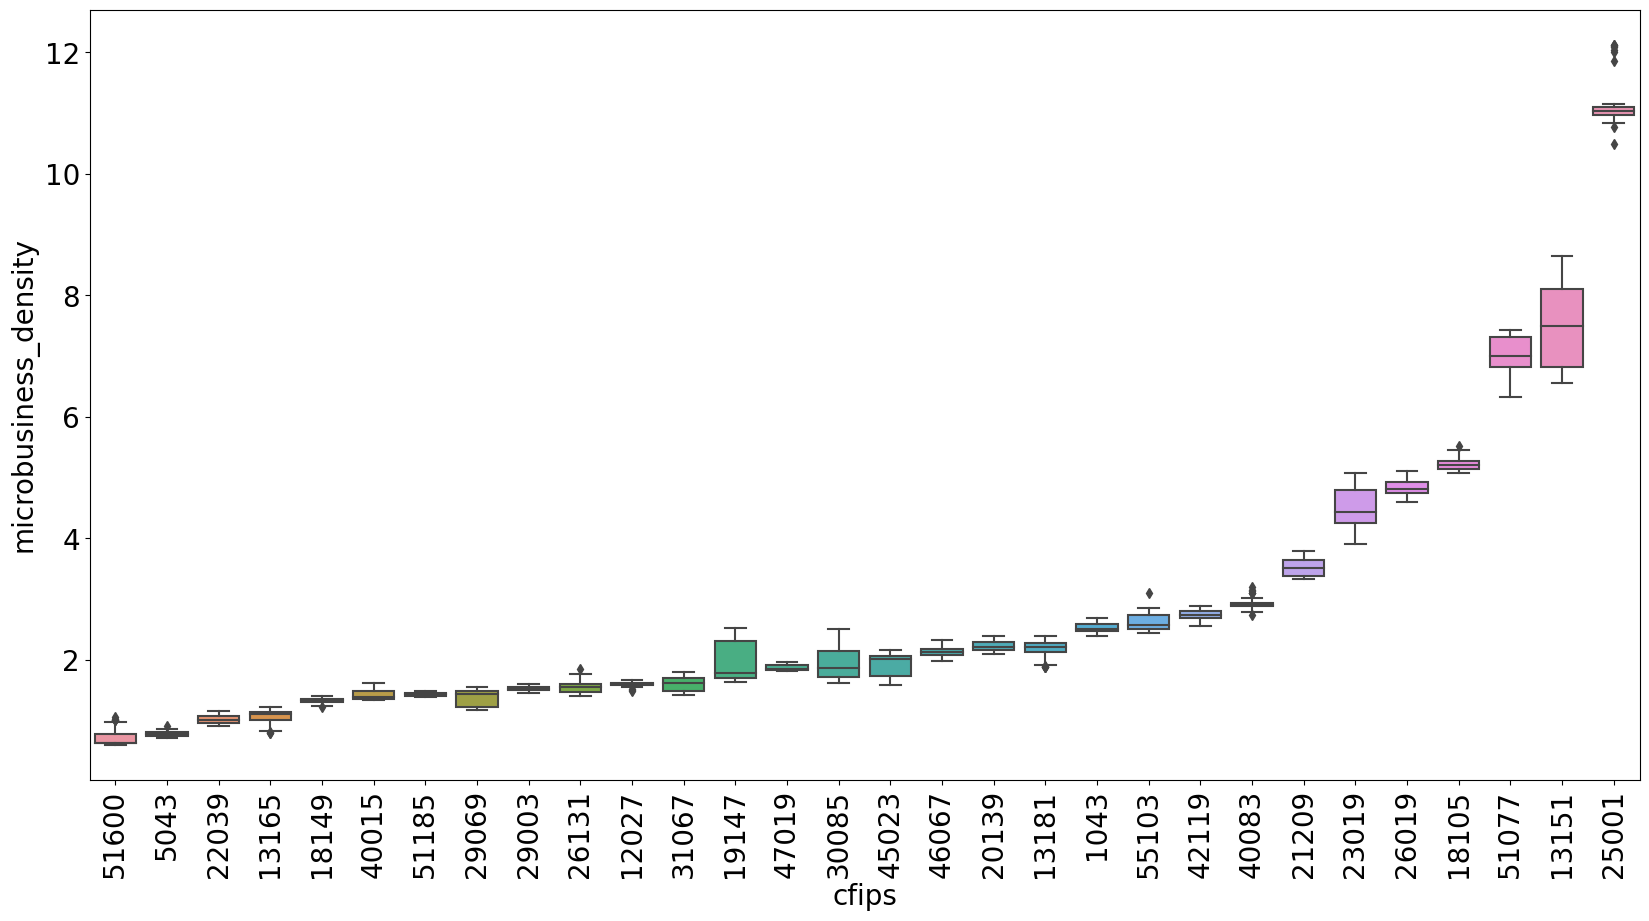

In [50]:
plt.figure(figsize=(20,10))
order = data.groupby('cfips')['microbusiness_density'].median().sort_values().index
sns.boxplot(y='microbusiness_density', x='cfips', data=data, order=order)
_ = plt.xticks(rotation=90)

In [38]:
cfips_mean = data.groupby('cfips')['microbusiness_density'].mean()

In [40]:
cfips_mean[cfips_mean<=3].index

Int64Index([ 1043,  5043, 12027, 13165, 13181, 18149, 19147, 20139, 22039,
            26131, 29003, 29069, 30085, 31067, 40015, 40083, 42119, 45023,
            46067, 47019, 51185, 51600, 55103],
           dtype='int64', name='cfips')

In [42]:
cfips_mean[(3<cfips_mean)&(cfips_mean<=6)].index

Int64Index([18105, 21209, 23019, 26019], dtype='int64', name='cfips')

In [43]:
cfips_mean[cfips_mean>6].index

Int64Index([13151, 25001, 51077], dtype='int64', name='cfips')

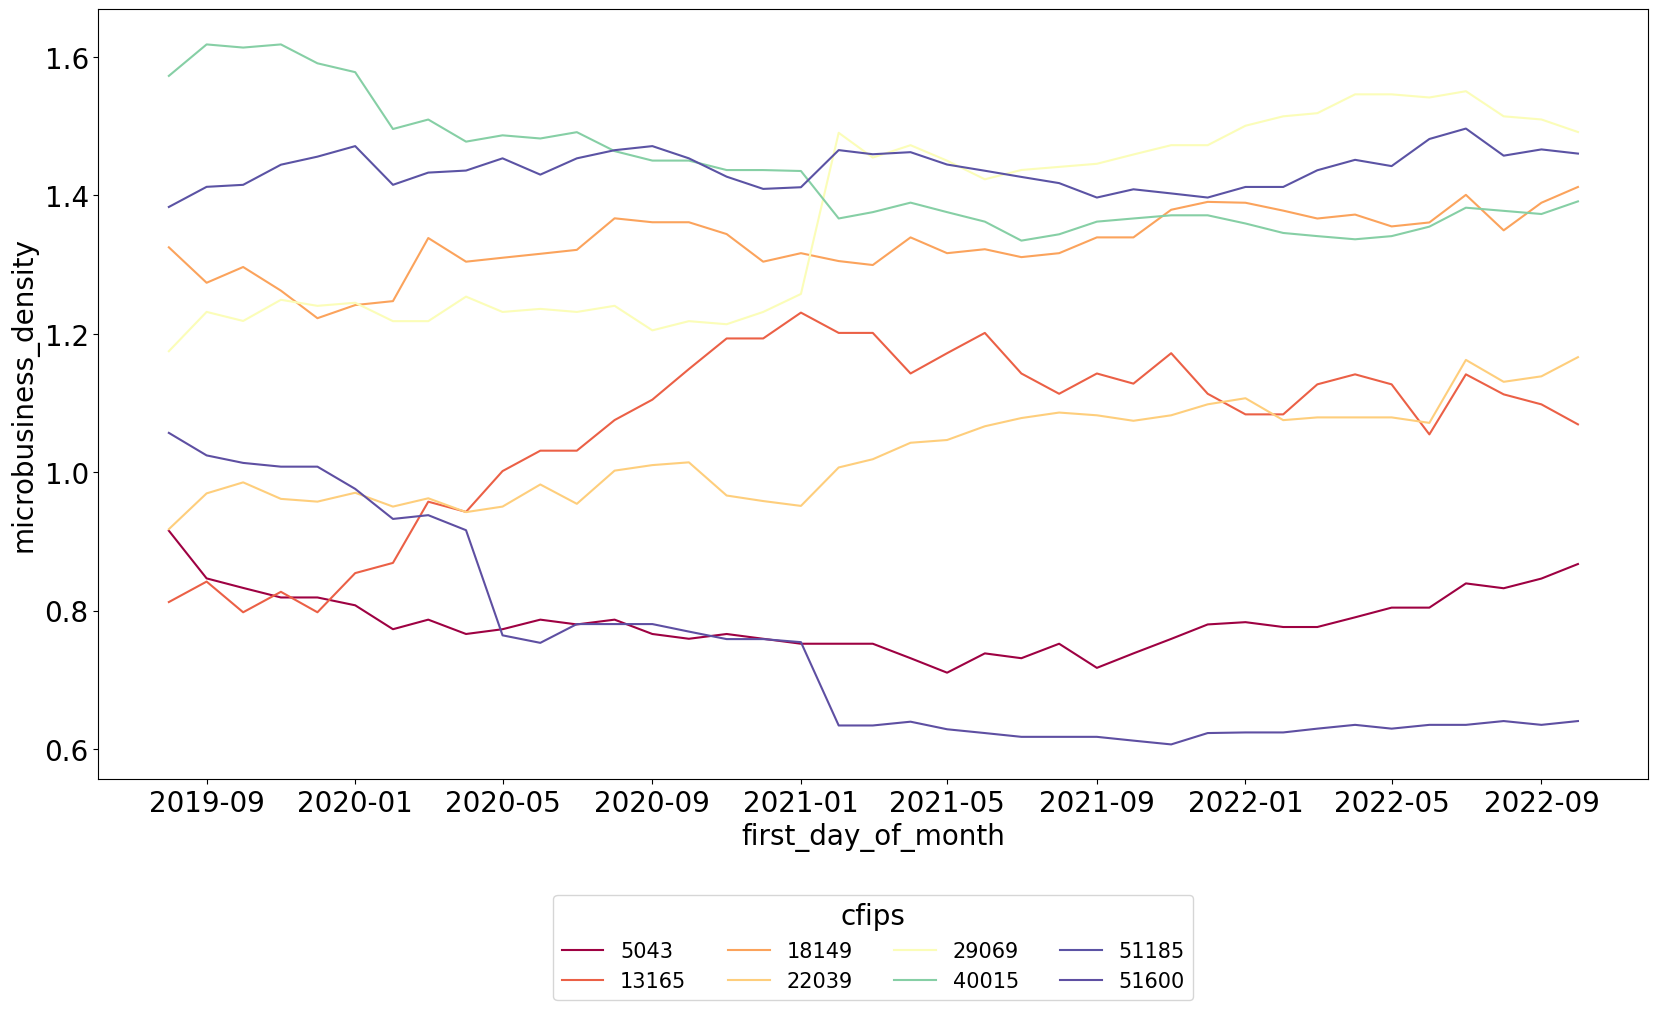

In [88]:
plt.figure(figsize=(20,10))
sns.lineplot(y='microbusiness_density', x='first_day_of_month', hue='cfips', data=data[data.cfips.isin(cfips_mean[cfips_mean<=1.5].index)], palette='Spectral', legend='full')
legend = plt.legend(title="cfips", ncol=4,bbox_to_anchor=(0.5, -0.3),loc='lower center',
           prop={'size': 15})

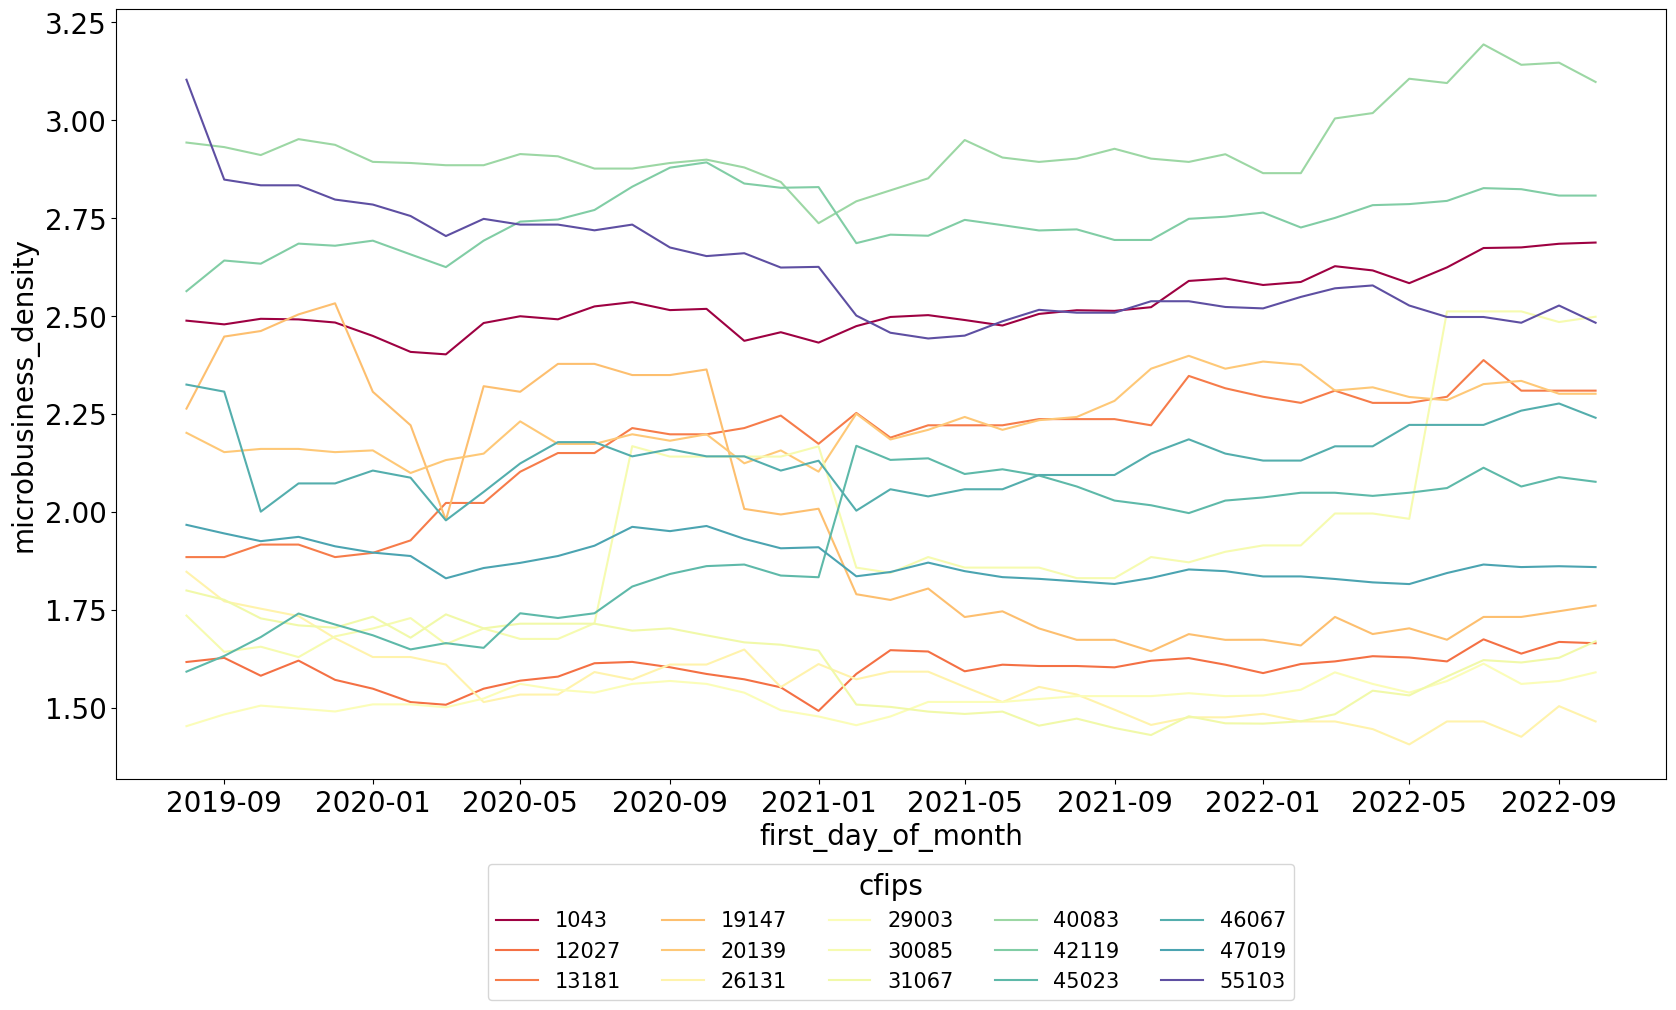

In [80]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(y='microbusiness_density', x='first_day_of_month', hue='cfips', data=data[data.cfips.isin(cfips_mean[(cfips_mean>1.5)&(cfips_mean<=3)].index)], palette='Spectral', legend='full')
legend = plt.legend(title="cfips", ncol=5,bbox_to_anchor=(0.5, -0.3),loc='lower center',
           prop={'size': 15})

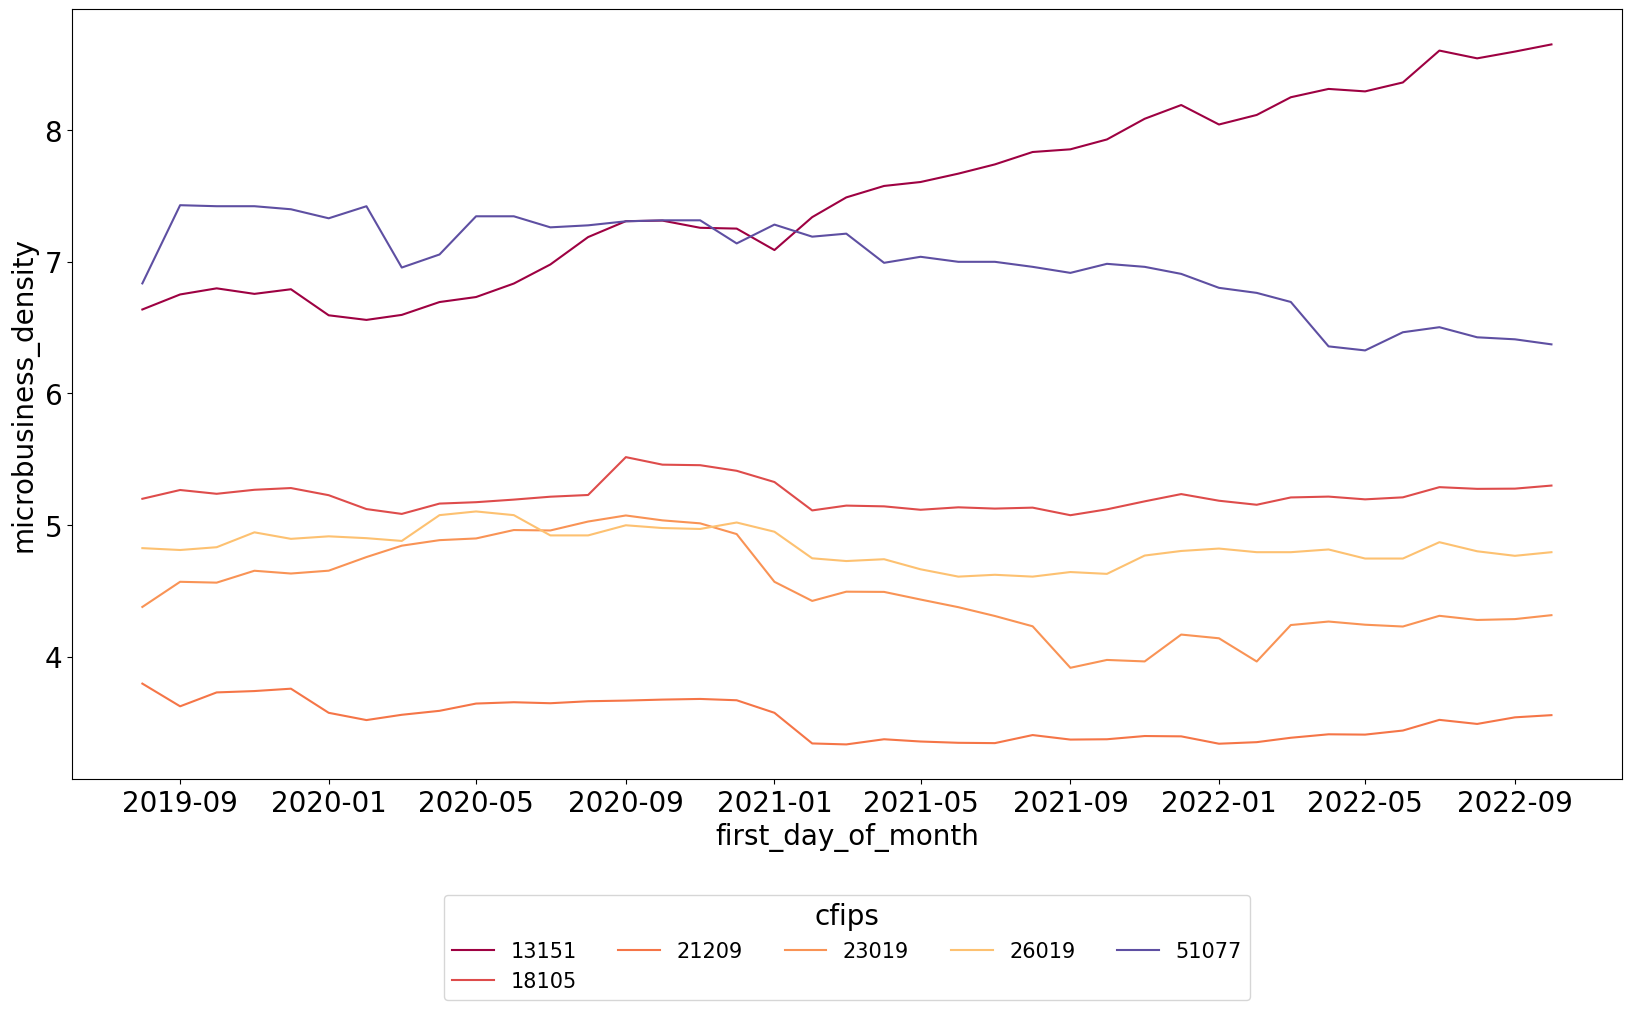

In [85]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(y='microbusiness_density', x='first_day_of_month', hue='cfips', data=data[data.cfips.isin(cfips_mean[(cfips_mean>3)&(cfips_mean<=8)].index)], palette='Spectral', legend='full')
legend = plt.legend(title="cfips", ncol=5,bbox_to_anchor=(0.5, -0.3),loc='lower center',
           prop={'size': 15})

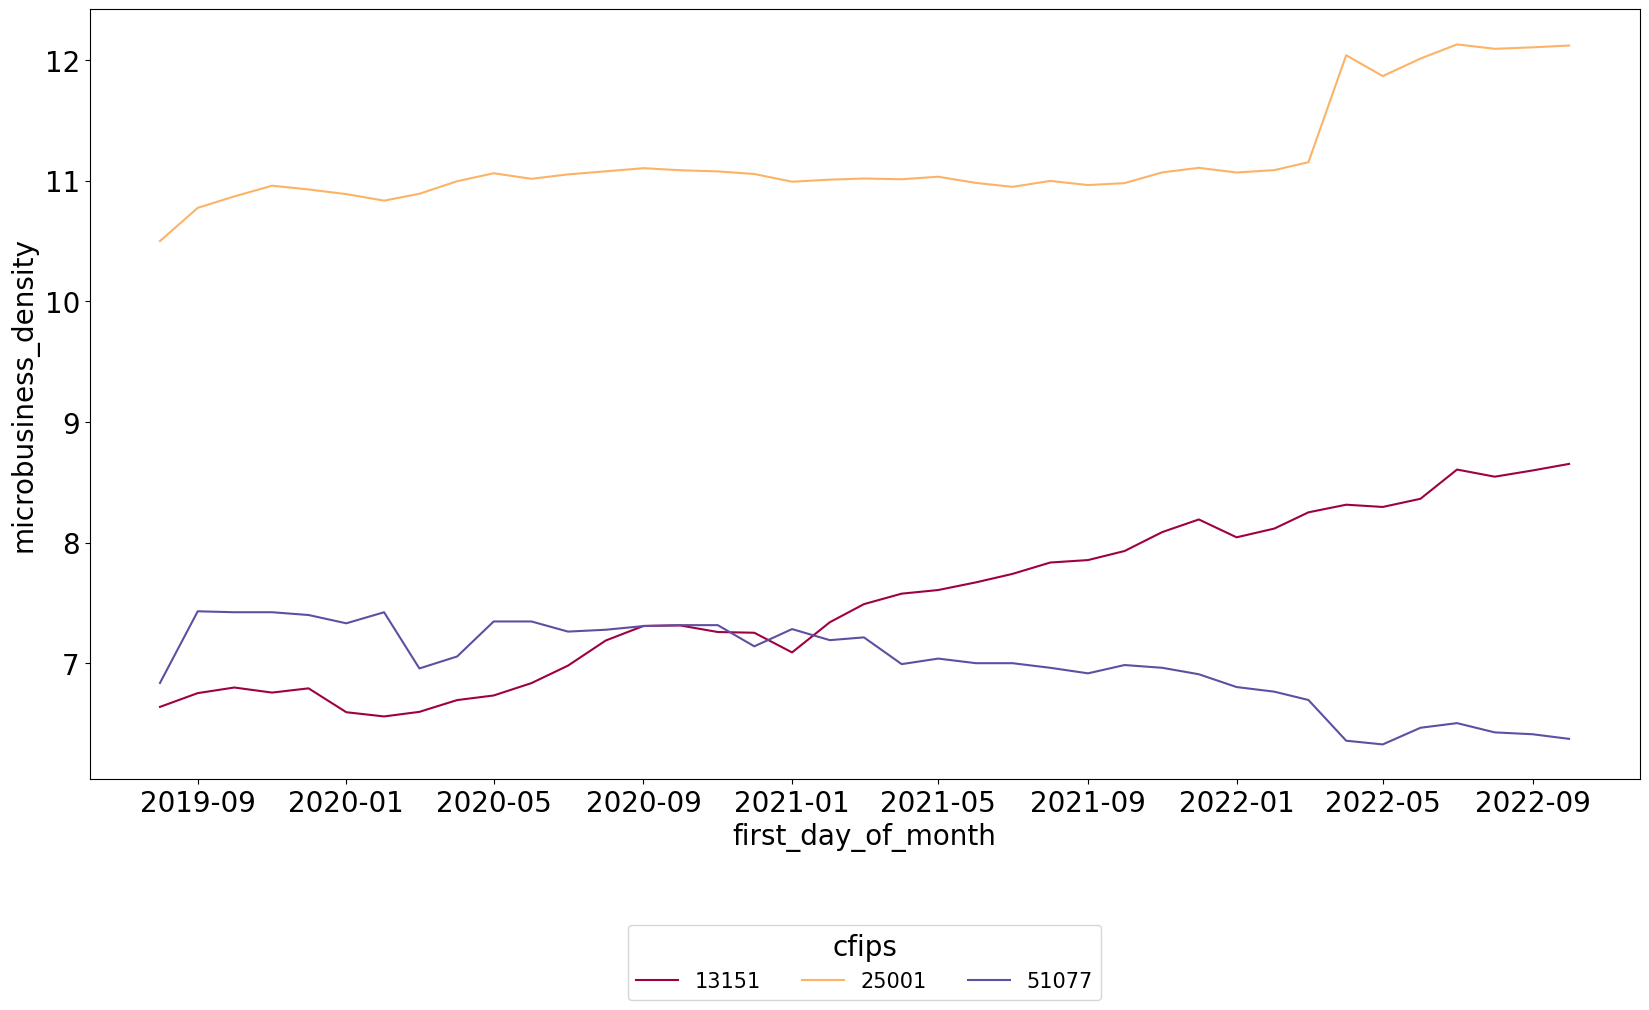

In [84]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(y='microbusiness_density', x='first_day_of_month', hue='cfips', data=data[data.cfips.isin(cfips_mean[(cfips_mean>6)].index)], palette='Spectral', legend='full')
legend = plt.legend(title="cfips", ncol=5,bbox_to_anchor=(0.5, -0.3),loc='lower center',
           prop={'size': 15})